## 1. Wiki philosophy (0.5 баллов)
Существует шуточный «закон Философии» для статей Википедии: если переходить по
первой нормальной ссылке в статье, то рано или поздно мы придем на статью о философии.
Ваша задача заключается в том, чтобы проверить этот закон.
Для этого нужно написать программу, которая получает на вход ссылку на статью Википедии, а потом циклически переходит по первой нормальной ссылке и повторяет эту операцию
(до тех пор, пока не будет достигнута статья о философии, или ссылки не зациклятся). Нормальной ссылкой будем называть ссылку, которая находится в основном содержании статьи,
не в инфобоксах и не в служебных блоках, написана синим цветом (красный соответствует
несуществующей статье), не курсивом, не являтся сноской и не находится в скобках.

<b>Результат</b> должен представлять из себя несколько статистик (проверьте не менее 100 стр., <i>больше - лучше</i>):
* Описание алгоритма, как вы решали, стр. по философии или нет?
* Количество начальных ссылок vs Количество конечных тем страниц (0 - стр. не по философии, 1 - по философии).
* Гистограмма длин путей.
* Соотношений успешных и неуспешных запросов.
* Что еще можно тут придумать? :)

<b>Обратите внимание</b>, что для проверки нормальности не обязательно разбирать таблицы стилей и
проверять цвет и т.п., достаточно сделать, чтобы программа работала для текущей верстки
википедии (например, можно использовать атрибут class у тегов).
Для удобства проверки сделайте, чтобы последовательность переходов выводилась на
экран.

<b>Внимание.</b> Чтобы не создавать большую нагрузку на сервер Википедии, сделайте так,
чтобы ваша программа делала не более 2-х запросов в секунду. Для этого воспользуйтесь
функцией sleep из модуля time.

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict
import time
from tqdm import tqdm
def tryDiveToPhilosophy(url):
    if url.find("Philosophy") != -1:
        return True, 0
    page = requests.get(url)
    soup = BeautifulSoup(page.content, "html.parser")
    head = soup.find(class_="firstHeading").get_text()
    print("STARTS AT -----------> " + page.url)
    visited = []
    visited.append(page.url)
    new_url = findFirstUrl(soup)
    if new_url is None:
            print("ERROR: pulled wrong link, test failed")
            return False, 0
    new_url = "https://en.wikipedia.org" + new_url
    while new_url not in visited and len(visited) < 50:
        print(new_url)
        visited.append(new_url)
        page = requests.get(new_url)
        soup = BeautifulSoup(page.content, "html.parser")
        if isPhilosophycal(soup):
            return True, len(visited) - 1
        time.sleep(0.4)
        new_url = findFirstUrl(soup)
        if new_url is None:
            print("ERROR: pulled wrong link, test failed")
            return False, len(visited) - 1
        new_url = "https://en.wikipedia.org" + new_url
        
    print(new_url)
    if new_url in visited:
        print("\n -------------> CYCLED")
    return False, len(visited) - 1

def findFirstUrl(soup):
    main_div = soup.find(class_="mw-parser-output")
    paragraphs = main_div.find_all('p', recursive=False)
    for par in paragraphs:
        a_tags = par.find_all('a')
        for href in a_tags:
            if href.has_attr("href"):
                if href["href"].find("#") == -1 and href["href"].find("Help") == -1 and \
                href["href"].find("ogg") == -1 and href["href"].find("help") == -1 and \
                href["href"].find("http") == -1:
                    if href.has_attr("title"):
                        if href["title"].find("(page does not exist)") != -1:
                            continue
                    return href["href"]

def isPhilosophycal(soup):
    categories = soup.find(id="mw-normal-catlinks")
    if categories is not None:
        if categories.get_text().find("Philosophy") != -1:
            print(categories.get_text())
            return True
    return False

In [2]:
steps = []
ledToPhi = []
for i in tqdm(range(100)):
    url = "https://en.wikipedia.org/wiki/Special:Random"
    result, num_steps = tryDiveToPhilosophy(url)
    ledToPhi.append(result)
    if result:
        steps.append(num_steps)
    print("\n\n\n")

  0%|          | 0/100 [00:00<?, ?it/s]

STARTS AT -----------> https://en.wikipedia.org/wiki/Okuno_Dam
https://en.wikipedia.org/wiki/Dam
https://en.wikipedia.org/wiki/Surface_water
https://en.wikipedia.org/wiki/Water
https://en.wikipedia.org/wiki/Chemical_substance
https://en.wikipedia.org/wiki/Matter
https://en.wikipedia.org/wiki/Classical_physics


  1%|          | 1/100 [00:05<08:44,  5.30s/it]

Categories: Subfields of physicsPhysical systemsPhilosophy of physics




STARTS AT -----------> https://en.wikipedia.org/wiki/Love_Go_Go!!
https://en.wikipedia.org/wiki/Japan
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


  2%|▏         | 2/100 [00:16<13:21,  8.18s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Raji_Rasaki
https://en.wikipedia.org/wiki/Nigeria
https://en.wikipedia.org/wiki/Federation
https://en.wikipedia.org/wiki/Political_entity
https://en.wikipedia.org/wiki/Identity_(social_science)
https://en.wikipedia.org/wiki/Psychology
https://en.wikipedia.org/wiki/Science
https://en.wikipedia.org/wiki/Latin_language
https://en.wikipedia.org/wiki/Classical_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


  3%|▎         | 3/100 [00:26<14:24,  8.91s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Lindsey_White
https://en.wikipedia.org/wiki/Tulsa,_Oklahoma
https://en.wikipedia.org/wiki/U.S._state
https://en.wikipedia.org/wiki/Polity
https://en.wikipedia.org/wiki/Identity_(social_science)
https://en.wikipedia.org/wiki/Psychology
https://en.wikipedia.org/wiki/Science
https://en.wikipedia.org/wiki/Latin_language
https://en.wikipedia.org/wiki/Classical_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


  4%|▍         | 4/100 [00:37<15:04,  9.42s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Creaking_Tree_String_Quartet
https://en.wikipedia.org/wiki/Toronto
https://en.wikipedia.org/wiki/Capital_city
https://en.wikipedia.org/wiki/Municipality
https://en.wikipedia.org/wiki/Urban_area
https://en.wikipedia.org/wiki/Human_settlement
https://en.wikipedia.org/wiki/Geography
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


  5%|▌         | 5/100 [00:50<15:55, 10.06s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Folkh%C3%A4lsan
https://en.wikipedia.org/wiki/Non-governmental_organization
https://en.wikipedia.org/wiki/Nonprofit_organization
https://en.wikipedia.org/wiki/Social_issue
https://en.wikipedia.org/wiki/Personal_life


  6%|▌         | 6/100 [00:53<14:04,  8.98s/it]

Categories: Personal lifeAnthropologyPhilosophy of life




STARTS AT -----------> https://en.wikipedia.org/wiki/John_Harris_(footballer,_born_1939)
https://en.wikipedia.org/wiki/Association_football
https://en.wikipedia.org/wiki/Team_sport
https://en.wikipedia.org/wiki/Sport
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


  7%|▋         | 7/100 [01:06<14:46,  9.53s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Pukhtoon_Students_Federation
https://en.wikipedia.org/wiki/Awami_National_Party
https://en.wikipedia.org/wiki/Pashto_language
https://en.wikipedia.org/wiki/Pashtuns


  8%|▊         | 8/100 [01:10<13:26,  8.76s/it]

https://en.wikipedia.org/wiki/Pashto_language

 -------------> CYCLED




STARTS AT -----------> https://en.wikipedia.org/wiki/Music_of_Henan
https://en.wikipedia.org/wiki/Province_of_China
https://en.wikipedia.org/wiki/Simplified_Chinese_characters
https://en.wikipedia.org/wiki/Chinese_character
https://en.wikipedia.org/wiki/Logogram
https://en.wikipedia.org/wiki/Written_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


  9%|▉         | 9/100 [01:18<13:13,  8.72s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Evan_Jones_(Stitch_Media)
https://en.wikipedia.org/wiki/Alternate_Reality_Game
https://en.wikipedia.org/wiki/Networked_narrative
https://en.wikipedia.org/wiki/Narrative
https://en.wikipedia.org/wiki/Nonfiction
https://en.wikipedia.org/wiki/Content_(media)
https://en.wikipedia.org/wiki/Information
https://en.wikipedia.org/wiki/Uncertainty
https://en.wikipedia.org/wiki/Ambiguity
https://en.wikipedia.org/wiki/Meaning_(linguistics)


 10%|█         | 10/100 [01:25<12:52,  8.58s/it]

Categories: Meaning (philosophy of language)Philosophical logicPhilosophy of languageSemantics




STARTS AT -----------> https://en.wikipedia.org/wiki/18th_Division_(North_Korea)
https://en.wikipedia.org/wiki/Korean_People%27s_Army
https://en.wikipedia.org/wiki/Hangul
https://en.wikipedia.org/wiki/Korean_language


 11%|█         | 11/100 [01:29<12:05,  8.15s/it]

https://en.wikipedia.org/wiki/Hangul

 -------------> CYCLED




STARTS AT -----------> https://en.wikipedia.org/wiki/The_Enemy_of_My_Enemy
https://en.wikipedia.org/wiki/Militant_Islam
https://en.wikipedia.org/wiki/Neologism
https://en.wikipedia.org/wiki/Ancient_Greek
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 12%|█▏        | 12/100 [01:38<12:01,  8.20s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Ali_Al_Shami
https://en.wikipedia.org/wiki/Shia_Islam_in_Lebanon
https://en.wikipedia.org/wiki/Lebanon
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 13%|█▎        | 13/100 [01:49<12:13,  8.43s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Magic_(Chesterton_play)
https://en.wikipedia.org/wiki/G._K._Chesterton
https://en.wikipedia.org/wiki/Order_of_St._Gregory_the_Great
https://en.wikipedia.org/wiki/Latin_language
https://en.wikipedia.org/wiki/Classical_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 14%|█▍        | 14/100 [01:57<12:00,  8.38s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Military_history_of_Austria
https://en.wikipedia.org/wiki/Military_Frontier
https://en.wikipedia.org/wiki/Marches
https://en.wikipedia.org/wiki/Medieval_Europe
https://en.wikipedia.org/wiki/History_of_Europe
https://en.wikipedia.org/wiki/Europe
https://en.wikipedia.org/wiki/Continent
https://en.wikipedia.org/wiki/World
https://en.wikipedia.org/wiki/Earth
https://en.wikipedia.org/wiki/Planet
https://en.wikipedia.org/wiki/Astronomical_body
https://en.wikipedia.org/wiki/Physical_body
https://en.wikipedia.org/wiki/Physics
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semi

 15%|█▌        | 15/100 [02:22<13:24,  9.47s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/As_Sabain_District
https://en.wikipedia.org/wiki/Districts_of_Yemen
https://en.wikipedia.org/wiki/Governorates_of_Yemen
https://en.wikipedia.org/wiki/Yemen
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 16%|█▌        | 16/100 [02:35<13:35,  9.70s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Spiral_(Stockhausen)
https://en.wikipedia.org/wiki/Shortwave_receiver
https://en.wikipedia.org/wiki/Radio_receiver
https://en.wikipedia.org/wiki/Radio
https://en.wikipedia.org/wiki/Radio_wave
https://en.wikipedia.org/wiki/Electromagnetic_radiation
https://en.wikipedia.org/wiki/Physics
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 17%|█▋        | 17/100 [02:47<13:38,  9.86s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Parmena_slamai
https://en.wikipedia.org/wiki/Beetle
https://en.wikipedia.org/wiki/Insect
https://en.wikipedia.org/wiki/Latin
https://en.wikipedia.org/wiki/Classical_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 18%|█▊        | 18/100 [02:54<13:16,  9.71s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/List_of_Iraqi_records_in_swimming
https://en.wikipedia.org/wiki/Iraq
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 19%|█▉        | 19/100 [03:06<13:13,  9.79s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Andrew_the_Apostle
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 20%|██        | 20/100 [03:13<12:52,  9.65s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Baro_Vatra
https://en.wikipedia.org/wiki/Gopalganj_District_(Bangladesh)
https://en.wikipedia.org/wiki/Bengali_language
https://en.wikipedia.org/wiki/Endonym
https://en.wikipedia.org/wiki/Geographical_place
https://en.wikipedia.org/wiki/Geography
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 21%|██        | 21/100 [03:24<12:47,  9.72s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Rudy_Behlmer
https://en.wikipedia.org/wiki/History_of_film
https://en.wikipedia.org/wiki/Auguste_and_Louis_Lumi%C3%A8re
https://en.wikipedia.org/wiki/Film_director
https://en.wikipedia.org/wiki/Film
https://en.wikipedia.org/wiki/Projection_screen
https://en.wikipedia.org/wiki/Image_projector
https://en.wikipedia.org/wiki/Optical
https://en.wikipedia.org/wiki/Physics
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 22%|██▏       | 22/100 [03:38<12:54,  9.93s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Julio_Villalba
https://en.wikipedia.org/wiki/Borussia_M%C3%B6nchengladbach
https://en.wikipedia.org/wiki/Football_in_Germany
https://en.wikipedia.org/wiki/Association_football
https://en.wikipedia.org/wiki/Team_sport
https://en.wikipedia.org/wiki/Sport
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 23%|██▎       | 23/100 [03:52<12:59, 10.13s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/DIMA_(database)
https://en.wikipedia.org/wiki/Protein%E2%80%93protein_interaction
https://en.wikipedia.org/wiki/Protein
https://en.wikipedia.org/wiki/Biomolecule
https://en.wikipedia.org/wiki/Molecule
https://en.wikipedia.org/wiki/Electrically
https://en.wikipedia.org/wiki/Physics
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 24%|██▍       | 24/100 [04:06<13:01, 10.28s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Blackbird_(comics)
https://en.wikipedia.org/wiki/Fiction
https://en.wikipedia.org/wiki/Narrative
https://en.wikipedia.org/wiki/Nonfiction
https://en.wikipedia.org/wiki/Content_(media)
https://en.wikipedia.org/wiki/Information
https://en.wikipedia.org/wiki/Uncertainty
https://en.wikipedia.org/wiki/Ambiguity
https://en.wikipedia.org/wiki/Meaning_(linguistics)


 25%|██▌       | 25/100 [04:14<12:42, 10.16s/it]

Categories: Meaning (philosophy of language)Philosophical logicPhilosophy of languageSemantics




STARTS AT -----------> https://en.wikipedia.org/wiki/2016_Asian_Dragon_Boat_Championships
https://en.wikipedia.org/wiki/Puerto_Princessa
https://en.wikipedia.org/wiki/Cuyonon_language
https://en.wikipedia.org/wiki/Regional_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 26%|██▌       | 26/100 [04:20<12:20, 10.00s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Fran%C3%A7ois_Mah%C3%A9
https://en.wikipedia.org/wiki/France
https://en.wikipedia.org/wiki/French_language
https://en.wikipedia.org/wiki/Romance_languages
https://en.wikipedia.org/wiki/Vulgar_Latin
https://en.wikipedia.org/wiki/Sociolect
https://en.wikipedia.org/wiki/Sociolinguistics
https://en.wikipedia.org/wiki/Society
https://en.wikipedia.org/wiki/Social_group
https://en.wikipedia.org/wiki/Social_science
https://en.wikipedia.org/wiki/Discipline_(academia)
https://en.wikipedia.org/wiki/Branch_(academia)
https://en.wikipedia.org/wiki/Knowledge
https://en.wikipedia.org/wiki/Fact


 27%|██▋       | 27/100 [04:33<12:20, 10.14s/it]

Categories: Concepts in epistemologyConcepts in logicPhilosophy of scienceRealityStatementsTruth




STARTS AT -----------> https://en.wikipedia.org/wiki/MassCourts
https://en.wikipedia.org/wiki/Law_practice_management_software
https://en.wikipedia.org/wiki/Software
https://en.wikipedia.org/wiki/Computer_system
https://en.wikipedia.org/wiki/Arithmetic
https://en.wikipedia.org/wiki/Ancient_Greek
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 28%|██▊       | 28/100 [04:44<12:11, 10.16s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Ismail_Tosun
https://en.wikipedia.org/wiki/Bozcaada
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 29%|██▉       | 29/100 [04:56<12:06, 10.23s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Joe_Inoue
https://en.wikipedia.org/wiki/Americans
https://en.wikipedia.org/wiki/Citizenship
https://en.wikipedia.org/wiki/Custom_(law)
https://en.wikipedia.org/wiki/Law
https://en.wikipedia.org/wiki/System
https://en.wikipedia.org/wiki/Latin
https://en.wikipedia.org/wiki/Classical_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 30%|███       | 30/100 [05:06<11:54, 10.21s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Motycz
https://en.wikipedia.org/wiki/Village
https://en.wikipedia.org/wiki/Human_settlement
https://en.wikipedia.org/wiki/Geography
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 31%|███       | 31/100 [05:15<11:41, 10.17s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Trial_Through_Fire
https://en.wikipedia.org/wiki/City_of_Fire_(band)
https://en.wikipedia.org/wiki/Groove_metal
https://en.wikipedia.org/wiki/Heavy_metal_music
https://en.wikipedia.org/wiki/Rock_music
https://en.wikipedia.org/wiki/Popular_music
https://en.wikipedia.org/wiki/Music_industry
https://en.wikipedia.org/wiki/Musical_composition
https://en.wikipedia.org/wiki/Music
https://en.wikipedia.org/wiki/Culture
https://en.wikipedia.org/wiki/Social_behavior
https://en.wikipedia.org/wiki/Behavior
https://en.wikipedia.org/wiki/American_English
https://en.wikipedia.org/wiki/United_States_of_America
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/M

 32%|███▏      | 32/100 [05:38<11:59, 10.58s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Tan_Kim_Huat
https://en.wikipedia.org/wiki/Fencing
https://en.wikipedia.org/wiki/Foil_(fencing)
https://en.wikipedia.org/wiki/Fencing_(sport)


 33%|███▎      | 33/100 [05:41<11:33, 10.35s/it]

https://en.wikipedia.org/wiki/Foil_(fencing)

 -------------> CYCLED




STARTS AT -----------> https://en.wikipedia.org/wiki/Phil_Ohman
https://en.wikipedia.org/wiki/United_States
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 34%|███▍      | 34/100 [05:53<11:25, 10.38s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Horda_Tidend
https://en.wikipedia.org/wiki/Voss
https://en.wikipedia.org/wiki/Municipalities_of_Norway
https://en.wikipedia.org/wiki/Norway
https://en.wikipedia.org/wiki/Norwegian_language
https://en.wikipedia.org/wiki/North_Germanic_languages
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 35%|███▌      | 35/100 [06:04<11:17, 10.43s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/List_of_Bollywood_films_of_1982
https://en.wikipedia.org/wiki/Bollywood
https://en.wikipedia.org/wiki/Metonymy
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 36%|███▌      | 36/100 [06:16<11:09, 10.46s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Western_Australian_state_election,_1908
https://en.wikipedia.org/wiki/Western_Australia
https://en.wikipedia.org/wiki/States_and_territories_of_Australia
https://en.wikipedia.org/wiki/Australia
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 37%|███▋      | 37/100 [06:30<11:04, 10.55s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Kanichi,_Peru
https://en.wikipedia.org/wiki/Ayacucho_Quechua
https://en.wikipedia.org/wiki/Southern_Quechua
https://en.wikipedia.org/wiki/Quechuan_languages
https://en.wikipedia.org/wiki/Indigenous_languages_of_the_Americas
https://en.wikipedia.org/wiki/Indigenous_peoples_of_the_Americas
https://en.wikipedia.org/wiki/Pre-Columbian
https://en.wikipedia.org/wiki/Archaeology_of_the_Americas
https://en.wikipedia.org/wiki/Archaeology
https://en.wikipedia.org/wiki/Human
https://en.wikipedia.org/wiki/Homo_sapiens
https://en.wikipedia.org/wiki/Taxonomy_(biology)
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https:

 38%|███▊      | 38/100 [06:51<11:11, 10.83s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Medovarce
https://en.wikipedia.org/wiki/Village
https://en.wikipedia.org/wiki/Human_settlement
https://en.wikipedia.org/wiki/Geography
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 39%|███▉      | 39/100 [07:01<10:59, 10.81s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Northeastern_Wisconsin_Zoo
https://en.wikipedia.org/wiki/Green_Bay,_Wisconsin
https://en.wikipedia.org/wiki/County_seat
https://en.wikipedia.org/wiki/Administrative_center
https://en.wikipedia.org/wiki/Local_government
https://en.wikipedia.org/wiki/Public_administration
https://en.wikipedia.org/wiki/Public_policy
https://en.wikipedia.org/wiki/Executive_(government)
https://en.wikipedia.org/wiki/Authority


 40%|████      | 40/100 [07:10<10:45, 10.76s/it]

Categories: Political philosophyPhilosophy of lawSocial conceptsGroup processesSocial ethicsAuthority




STARTS AT -----------> https://en.wikipedia.org/wiki/Ilex_qianlingshanensis
https://en.wikipedia.org/wiki/Qianling_Mountain
https://en.wikipedia.org/wiki/Chinese_language
https://en.wikipedia.org/wiki/Simplified_Chinese_characters
https://en.wikipedia.org/wiki/Chinese_character
https://en.wikipedia.org/wiki/Logogram
https://en.wikipedia.org/wiki/Written_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 41%|████      | 41/100 [07:20<10:33, 10.74s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Parennomos
https://en.wikipedia.org/wiki/Geometridae
https://en.wikipedia.org/wiki/Family_(biology)
https://en.wikipedia.org/wiki/Biological_classification
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 42%|████▏     | 42/100 [07:30<10:21, 10.72s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Greymachine
https://en.wikipedia.org/wiki/Experimental_music
https://en.wikipedia.org/wiki/Indeterminacy_in_music
https://en.wikipedia.org/wiki/John_Cage


 43%|████▎     | 43/100 [07:33<10:01, 10.54s/it]

Categories: 1912 births1992 deaths20th-century classical composersBallet composersAmerican anarchistsAmerican male classical composersAmerican classical composers20th-century American writersAnarchist poetsLGBT artists from the United StatesHarvard University peopleAnarchist musiciansExperimental composersFluxusGuggenheim FellowsKyoto laureates in Arts and PhilosophyLGBT musicians from the United StatesLGBT people from CaliforniaLGBT BuddhistsLGBT composersAmerican opera composersMusicians from Los AngelesMysticsBlack Mountain College facultyWesleyan University facultyMills College facultyContemporary classical music performersAmerican Zen BuddhistsAmerican experimental musiciansAvant-garde pianistsCornish College of the Arts facultyFellows of the American Academy of Arts and SciencesConverts to BuddhismPupils of Arnold SchoenbergPupils of Henry CowellPeople from Stony Point, New York20th-century poets20th-century classical pianists20th-century American pianistsMale opera composersExpe

 44%|████▍     | 44/100 [07:44<09:51, 10.56s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Marsha_Mehran
https://en.wikipedia.org/wiki/Persian_language
https://en.wikipedia.org/wiki/Endonym
https://en.wikipedia.org/wiki/Geographical_place
https://en.wikipedia.org/wiki/Geography
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 45%|████▌     | 45/100 [07:55<09:40, 10.56s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Eight_per_thousand
https://en.wikipedia.org/wiki/Italian_language
https://en.wikipedia.org/wiki/Romance_languages
https://en.wikipedia.org/wiki/Vulgar_Latin
https://en.wikipedia.org/wiki/Sociolect
https://en.wikipedia.org/wiki/Sociolinguistics
https://en.wikipedia.org/wiki/Society
https://en.wikipedia.org/wiki/Social_group
https://en.wikipedia.org/wiki/Social_science
https://en.wikipedia.org/wiki/Discipline_(academia)
https://en.wikipedia.org/wiki/Branch_(academia)
https://en.wikipedia.org/wiki/Knowledge
https://en.wikipedia.org/wiki/Fact


 46%|████▌     | 46/100 [08:07<09:31, 10.59s/it]

Categories: Concepts in epistemologyConcepts in logicPhilosophy of scienceRealityStatementsTruth




STARTS AT -----------> https://en.wikipedia.org/wiki/Fight%2B
https://en.wikipedia.org/wiki/Steffen_Tangstad
https://en.wikipedia.org/wiki/Norway
https://en.wikipedia.org/wiki/Norwegian_language
https://en.wikipedia.org/wiki/North_Germanic_languages
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 47%|████▋     | 47/100 [08:17<09:21, 10.59s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/2017%E2%80%9318_Lowland_Football_League
https://en.wikipedia.org/wiki/Lowland_Football_League
https://en.wikipedia.org/wiki/Association_football
https://en.wikipedia.org/wiki/Team_sport
https://en.wikipedia.org/wiki/Sport
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 48%|████▊     | 48/100 [08:31<09:13, 10.65s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Saku_Koivu
https://en.wikipedia.org/wiki/Finns
https://en.wikipedia.org/wiki/Finnish_language
https://en.wikipedia.org/wiki/Finnic_language
https://en.wikipedia.org/wiki/Uralic_language_family
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 49%|████▉     | 49/100 [08:38<08:59, 10.59s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Wilburton_Inn
https://en.wikipedia.org/wiki/Manchester_(village),_Vermont
https://en.wikipedia.org/wiki/Village_(Vermont)
https://en.wikipedia.org/wiki/Vermont
https://en.wikipedia.org/wiki/U.S._state
https://en.wikipedia.org/wiki/Polity
https://en.wikipedia.org/wiki/Identity_(social_science)
https://en.wikipedia.org/wiki/Psychology
https://en.wikipedia.org/wiki/Science
https://en.wikipedia.org/wiki/Latin_language
https://en.wikipedia.org/wiki/Classical_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 50%|█████     | 50/100 [08:52<08:52, 10.65s/it]

Categories: Philosophy of languageMeaning (philosophy of language)






 51%|█████     | 51/100 [08:53<08:32, 10.45s/it]

STARTS AT -----------> https://en.wikipedia.org/wiki/Herczeg
ERROR: pulled wrong link, test failed




STARTS AT -----------> https://en.wikipedia.org/wiki/2gether_(Warren_Vach%C3%A9_and_Bill_Charlap_album)
https://en.wikipedia.org/wiki/Warren_Vach%C3%A9
https://en.wikipedia.org/wiki/Rahway,_New_Jersey
https://en.wikipedia.org/wiki/City_(New_Jersey)
https://en.wikipedia.org/wiki/New_Jersey
https://en.wikipedia.org/wiki/U.S._state
https://en.wikipedia.org/wiki/Polity
https://en.wikipedia.org/wiki/Identity_(social_science)
https://en.wikipedia.org/wiki/Psychology
https://en.wikipedia.org/wiki/Science
https://en.wikipedia.org/wiki/Latin_language
https://en.wikipedia.org/wiki/Classical_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 52%|█████▏    | 52/100 [09:06<08:24, 10.51s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/John_Utendahl
https://en.wikipedia.org/wiki/African_American
https://en.wikipedia.org/wiki/Ethnic_group
https://en.wikipedia.org/wiki/Identity_(social_science)
https://en.wikipedia.org/wiki/Psychology
https://en.wikipedia.org/wiki/Science
https://en.wikipedia.org/wiki/Latin_language
https://en.wikipedia.org/wiki/Classical_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 53%|█████▎    | 53/100 [09:16<08:13, 10.50s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Dan_Rotman
https://en.wikipedia.org/wiki/United_States
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 54%|█████▍    | 54/100 [09:29<08:04, 10.54s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Jean-Michel_Capoue
https://en.wikipedia.org/wiki/Association_football
https://en.wikipedia.org/wiki/Team_sport
https://en.wikipedia.org/wiki/Sport
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 55%|█████▌    | 55/100 [09:41<07:56, 10.58s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Tight_Fittin%27_Jeans
https://en.wikipedia.org/wiki/Conway_Twitty
https://en.wikipedia.org/wiki/Stage_name
https://en.wikipedia.org/wiki/Pseudonym
https://en.wikipedia.org/wiki/Name
https://en.wikipedia.org/wiki/Term_(language)
https://en.wikipedia.org/wiki/Word
https://en.wikipedia.org/wiki/Linguistics
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 56%|█████▌    | 56/100 [09:50<07:43, 10.54s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/WAEZ
https://en.wikipedia.org/wiki/FM_broadcasting
https://en.wikipedia.org/wiki/Radio_broadcasting
https://en.wikipedia.org/wiki/Radio_waves
https://en.wikipedia.org/wiki/Electromagnetic_radiation
https://en.wikipedia.org/wiki/Physics
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 57%|█████▋    | 57/100 [10:02<07:34, 10.56s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Leit%C3%A3o_(futsal_player)
https://en.wikipedia.org/wiki/Futsal
https://en.wikipedia.org/wiki/Association_football
https://en.wikipedia.org/wiki/Team_sport
https://en.wikipedia.org/wiki/Sport
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 58%|█████▊    | 58/100 [10:16<07:26, 10.63s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Cable_Head,_Prince_Edward_Island
https://en.wikipedia.org/wiki/List_of_communities_in_Prince_Edward_Island
https://en.wikipedia.org/wiki/Prince_Edward_Island
https://en.wikipedia.org/wiki/French_language
https://en.wikipedia.org/wiki/Romance_languages
https://en.wikipedia.org/wiki/Vulgar_Latin
https://en.wikipedia.org/wiki/Sociolect
https://en.wikipedia.org/wiki/Sociolinguistics
https://en.wikipedia.org/wiki/Society
https://en.wikipedia.org/wiki/Social_group
https://en.wikipedia.org/wiki/Social_science
https://en.wikipedia.org/wiki/Discipline_(academia)
https://en.wikipedia.org/wiki/Branch_(academia)
https://en.wikipedia.org/wiki/Knowledge
https://en.wikipedia.org/wiki/Fact


 59%|█████▉    | 59/100 [10:30<07:18, 10.69s/it]

Categories: Concepts in epistemologyConcepts in logicPhilosophy of scienceRealityStatementsTruth




STARTS AT -----------> https://en.wikipedia.org/wiki/Roy_Stryker
https://en.wikipedia.org/wiki/Photojournalism
https://en.wikipedia.org/wiki/Journalism
https://en.wikipedia.org/wiki/Report
https://en.wikipedia.org/wiki/Information
https://en.wikipedia.org/wiki/Uncertainty
https://en.wikipedia.org/wiki/Ambiguity
https://en.wikipedia.org/wiki/Meaning_(linguistics)


 60%|██████    | 60/100 [10:36<07:04, 10.61s/it]

Categories: Meaning (philosophy of language)Philosophical logicPhilosophy of languageSemantics




STARTS AT -----------> https://en.wikipedia.org/wiki/Erin_go_bragh
https://en.wikipedia.org/wiki/Anglicisation
https://en.wikipedia.org/wiki/Romanisation
https://en.wikipedia.org/wiki/Linguistics
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 61%|██████    | 61/100 [10:41<06:50, 10.52s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Adrienna_Jenkins
https://en.wikipedia.org/wiki/Mixed_martial_arts
https://en.wikipedia.org/wiki/Combat_sport
https://en.wikipedia.org/wiki/Contact_sport
https://en.wikipedia.org/wiki/Sport
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 62%|██████▏   | 62/100 [10:54<06:41, 10.56s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Carolyn_McCarthy
https://en.wikipedia.org/wiki/United_States_House_of_Representatives
https://en.wikipedia.org/wiki/Lower_house
https://en.wikipedia.org/wiki/Debate_chamber
https://en.wikipedia.org/wiki/Debate
https://en.wikipedia.org/wiki/Argument
https://en.wikipedia.org/wiki/Logic
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 63%|██████▎   | 63/100 [11:08<06:32, 10.61s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/1912_College_Baseball_All-Southern_Team
https://en.wikipedia.org/wiki/Baseball
https://en.wikipedia.org/wiki/Bat-and-ball_games
https://en.wikipedia.org/wiki/Golf
https://en.wikipedia.org/wiki/Sport
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 64%|██████▍   | 64/100 [11:21<06:23, 10.65s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/John_Walker_Soccer_Complex
https://en.wikipedia.org/wiki/Soccer-specific_stadium
https://en.wikipedia.org/wiki/Association_football
https://en.wikipedia.org/wiki/Team_sport
https://en.wikipedia.org/wiki/Sport
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 65%|██████▌   | 65/100 [11:35<06:14, 10.70s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Ben_Cotton
https://en.wikipedia.org/wiki/Stargate_Atlantis
https://en.wikipedia.org/wiki/Television_in_Canada
https://en.wikipedia.org/wiki/Montreal
https://en.wikipedia.org/wiki/File:Montreal-English-pronunciation.oga


 66%|██████▌   | 66/100 [11:39<06:00, 10.60s/it]

ERROR: pulled wrong link, test failed




STARTS AT -----------> https://en.wikipedia.org/wiki/Grand_Prix_de_Litt%C3%A9rature_Am%C3%A9ricaine
https://en.wikipedia.org/wiki/Literary_award
https://en.wikipedia.org/wiki/Award
https://en.wikipedia.org/wiki/Recognition_(sociology)
https://en.wikipedia.org/wiki/Sociology
https://en.wikipedia.org/wiki/Society
https://en.wikipedia.org/wiki/Social_group
https://en.wikipedia.org/wiki/Social_science
https://en.wikipedia.org/wiki/Discipline_(academia)
https://en.wikipedia.org/wiki/Branch_(academia)
https://en.wikipedia.org/wiki/Knowledge
https://en.wikipedia.org/wiki/Fact


 67%|██████▋   | 67/100 [11:49<05:49, 10.59s/it]

Categories: Concepts in epistemologyConcepts in logicPhilosophy of scienceRealityStatementsTruth




STARTS AT -----------> https://en.wikipedia.org/wiki/Capaya_District
https://en.wikipedia.org/wiki/Districts_of_Peru
https://en.wikipedia.org/wiki/District
https://en.wikipedia.org/wiki/Administrative_division
https://en.wikipedia.org/wiki/Country
https://en.wikipedia.org/wiki/Political_geography
https://en.wikipedia.org/wiki/Politics
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 68%|██████▊   | 68/100 [12:02<05:39, 10.62s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/French_Flute_School
https://en.wikipedia.org/wiki/Claude-Paul_Taffanel
https://en.wikipedia.org/wiki/Flautist
https://en.wikipedia.org/wiki/Musical_instrument
https://en.wikipedia.org/wiki/Music
https://en.wikipedia.org/wiki/Culture
https://en.wikipedia.org/wiki/Social_behavior
https://en.wikipedia.org/wiki/Behavior
https://en.wikipedia.org/wiki/American_English
https://en.wikipedia.org/wiki/United_States_of_America
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
h

 69%|██████▉   | 69/100 [12:21<05:32, 10.74s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Seraucourt-le-Grand
https://en.wikipedia.org/wiki/Communes_of_France
https://en.wikipedia.org/wiki/Administrative_divisions
https://en.wikipedia.org/wiki/Country
https://en.wikipedia.org/wiki/Political_geography
https://en.wikipedia.org/wiki/Politics
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 70%|███████   | 70/100 [12:31<05:22, 10.74s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Quebec-Israel_Committee
https://en.wikipedia.org/wiki/Canada
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 71%|███████   | 71/100 [12:42<05:11, 10.73s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Jurjevac_Punitova%C4%8Dki
https://en.wikipedia.org/wiki/Village
https://en.wikipedia.org/wiki/Human_settlement
https://en.wikipedia.org/wiki/Geography
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 72%|███████▏  | 72/100 [12:51<04:59, 10.71s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Adet
https://en.wikipedia.org/wiki/Ethiopia
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 73%|███████▎  | 73/100 [13:02<04:49, 10.72s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Brzezice,_Masovian_Voivodeship
https://en.wikipedia.org/wiki/Human_settlement
https://en.wikipedia.org/wiki/Geography
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 74%|███████▍  | 74/100 [13:11<04:38, 10.70s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Dar_ul_Ihsan_railway_station
https://en.wikipedia.org/wiki/Urdu_language


 75%|███████▌  | 75/100 [13:13<04:24, 10.58s/it]

https://en.wikipedia.org/wiki/Urdu_language

 -------------> CYCLED




STARTS AT -----------> https://en.wikipedia.org/wiki/Wilhelm_Anderson
https://en.wikipedia.org/wiki/Belarusian_language
https://en.wikipedia.org/wiki/Belarus
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 76%|███████▌  | 76/100 [13:25<04:14, 10.60s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Matt_C._Harris
https://en.wikipedia.org/wiki/Village_Ventures
https://en.wikipedia.org/wiki/Private_equity
https://en.wikipedia.org/wiki/Investment_fund
https://en.wikipedia.org/wiki/Investment
https://en.wikipedia.org/wiki/Time
https://en.wikipedia.org/wiki/Sequence
https://en.wikipedia.org/wiki/Mathematics
https://en.wikipedia.org/wiki/Ancient_Greek
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 77%|███████▋  | 77/100 [13:41<04:05, 10.66s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Nimco_Ahmed
https://en.wikipedia.org/wiki/Somali_language
https://en.wikipedia.org/wiki/Afroasiatic_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 78%|███████▊  | 78/100 [13:48<03:53, 10.62s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Arthur_Dorman
https://en.wikipedia.org/wiki/Order_of_the_British_Empire
https://en.wikipedia.org/wiki/Order_of_chivalry
https://en.wikipedia.org/wiki/Order_(honour)
https://en.wikipedia.org/wiki/Honour
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 79%|███████▉  | 79/100 [14:01<03:43, 10.66s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Haikou_dialect
https://en.wikipedia.org/wiki/Hainanese
https://en.wikipedia.org/wiki/Hainan_Romanised
https://en.wikipedia.org/wiki/Pe%CC%8Dh-o%C4%93-j%C4%AB
https://en.wikipedia.org/wiki/Orthography
https://en.wikipedia.org/wiki/Convention_(norm)
https://en.wikipedia.org/wiki/Norm_(philosophy)


 80%|████████  | 80/100 [14:06<03:31, 10.59s/it]

Categories: Concepts in ethicsConsensus realityPhilosophy of languagePhilosophy of lawSocial concepts




STARTS AT -----------> https://en.wikipedia.org/wiki/Old_Brook_(England)
https://en.wikipedia.org/wiki/Shaw_and_Crompton
https://en.wikipedia.org/wiki/Civil_parishes_in_England
https://en.wikipedia.org/wiki/England
https://en.wikipedia.org/wiki/Country
https://en.wikipedia.org/wiki/Political_geography
https://en.wikipedia.org/wiki/Politics
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 81%|████████  | 81/100 [14:18<03:21, 10.60s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Hills_Ferry,_California
https://en.wikipedia.org/wiki/Unincorporated_area
https://en.wikipedia.org/wiki/Real_property
https://en.wikipedia.org/wiki/England
https://en.wikipedia.org/wiki/Country
https://en.wikipedia.org/wiki/Political_geography
https://en.wikipedia.org/wiki/Politics
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 82%|████████▏ | 82/100 [14:30<03:11, 10.62s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Cycas_campestris
https://en.wikipedia.org/wiki/Cycad
https://en.wikipedia.org/wiki/Seed_plant
https://en.wikipedia.org/wiki/Plant
https://en.wikipedia.org/wiki/Multicellular_organism
https://en.wikipedia.org/wiki/Organism
https://en.wikipedia.org/wiki/Biology
https://en.wikipedia.org/wiki/Natural_science
https://en.wikipedia.org/wiki/Science
https://en.wikipedia.org/wiki/Latin_language
https://en.wikipedia.org/wiki/Classical_language
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 83%|████████▎ | 83/100 [14:43<03:00, 10.65s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Daniel_Alexander_Cameron
https://en.wikipedia.org/wiki/Canada
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 84%|████████▍ | 84/100 [14:54<02:50, 10.65s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Swiss_Suite
https://en.wikipedia.org/wiki/Oliver_Nelson
https://en.wikipedia.org/wiki/Jazz
https://en.wikipedia.org/wiki/Music_genre
https://en.wikipedia.org/wiki/Music
https://en.wikipedia.org/wiki/Culture
https://en.wikipedia.org/wiki/Social_behavior
https://en.wikipedia.org/wiki/Behavior
https://en.wikipedia.org/wiki/American_English
https://en.wikipedia.org/wiki/United_States_of_America
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wi

 85%|████████▌ | 85/100 [15:13<02:41, 10.75s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Vazesht
https://en.wikipedia.org/wiki/Persian_language
https://en.wikipedia.org/wiki/Endonym
https://en.wikipedia.org/wiki/Geographical_place
https://en.wikipedia.org/wiki/Geography
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 86%|████████▌ | 86/100 [15:23<02:30, 10.74s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Udamaluwa
https://en.wikipedia.org/wiki/Sri_Lanka
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 87%|████████▋ | 87/100 [15:34<02:19, 10.74s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Michael_Folk
https://en.wikipedia.org/wiki/Martinsburg,_West_Virginia
https://en.wikipedia.org/wiki/County_seat
https://en.wikipedia.org/wiki/Administrative_center
https://en.wikipedia.org/wiki/Local_government
https://en.wikipedia.org/wiki/Public_administration
https://en.wikipedia.org/wiki/Public_policy
https://en.wikipedia.org/wiki/Executive_(government)
https://en.wikipedia.org/wiki/Authority


 88%|████████▊ | 88/100 [15:40<02:08, 10.69s/it]

Categories: Political philosophyPhilosophy of lawSocial conceptsGroup processesSocial ethicsAuthority




STARTS AT -----------> https://en.wikipedia.org/wiki/Carr_Peak
https://en.wikipedia.org/wiki/Chiricahua_Peak
https://en.wikipedia.org/wiki/Chiricahua_Mountains
https://en.wikipedia.org/wiki/Massif
https://en.wikipedia.org/wiki/Geology
https://en.wikipedia.org/wiki/Ancient_Greek
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 89%|████████▉ | 89/100 [15:53<01:57, 10.71s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Categories_for_the_Working_Mathematician
https://en.wikipedia.org/wiki/Category_theory
https://en.wikipedia.org/wiki/Mathematical_structure
https://en.wikipedia.org/wiki/Mathematics
https://en.wikipedia.org/wiki/Ancient_Greek
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 90%|█████████ | 90/100 [16:02<01:46, 10.70s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Simon_Spencer
https://en.wikipedia.org/wiki/Association_football
https://en.wikipedia.org/wiki/Team_sport
https://en.wikipedia.org/wiki/Sport
https://en.wikipedia.org/wiki/British_English
https://en.wikipedia.org/wiki/English_language
https://en.wikipedia.org/wiki/West_Germanic_language
https://en.wikipedia.org/wiki/Germanic_languages
https://en.wikipedia.org/wiki/Indo-European_languages
https://en.wikipedia.org/wiki/Language_family
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 91%|█████████ | 91/100 [16:14<01:36, 10.71s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Ted_Paige
https://en.wikipedia.org/wiki/Fellow_of_the_Royal_Society
https://en.wikipedia.org/wiki/Royal_Society
https://en.wikipedia.org/wiki/Learned_society
https://en.wikipedia.org/wiki/Organisation
https://en.wikipedia.org/wiki/Entity
https://en.wikipedia.org/wiki/Existence


 92%|█████████▏| 92/100 [16:19<01:25, 10.64s/it]

Categories: OntologyConcepts in metaphysicsPhilosophy of lifeRealityAssumption




STARTS AT -----------> https://en.wikipedia.org/wiki/2012_in_China
https://en.wikipedia.org/wiki/China
https://en.wikipedia.org/wiki/Unitary_state
https://en.wikipedia.org/wiki/State_(polity)
https://en.wikipedia.org/wiki/Political
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 93%|█████████▎| 93/100 [16:29<01:14, 10.64s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Crewe_Gresty_Lane_TMD
https://en.wikipedia.org/wiki/Traction_maintenance_depot
https://en.wikipedia.org/wiki/United_Kingdom
https://en.wikipedia.org/wiki/Country
https://en.wikipedia.org/wiki/Political_geography
https://en.wikipedia.org/wiki/Politics
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 94%|█████████▍| 94/100 [16:40<01:03, 10.64s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/Blossom_Dearie_Sings_Comden_and_Green
https://en.wikipedia.org/wiki/1959_in_music
https://en.wikipedia.org/wiki/Hot_100_number-one_hits_of_1959_(United_States)
https://en.wikipedia.org/wiki/Billboard_magazine
https://en.wikipedia.org/wiki/Eldridge_Industries
https://en.wikipedia.org/wiki/Private_equity
https://en.wikipedia.org/wiki/Investment_fund
https://en.wikipedia.org/wiki/Investment
https://en.wikipedia.org/wiki/Time
https://en.wikipedia.org/wiki/Sequence
https://en.wikipedia.org/wiki/Mathematics
https://en.wikipedia.org/wiki/Ancient_Greek
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 95%|█████████▌| 95/100 [16:56<00:53, 10.70s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/The_Sword_of_the_Lady
https://en.wikipedia.org/wiki/Alternate_history
https://en.wikipedia.org/wiki/Genre
https://en.wikipedia.org/wiki/French_language
https://en.wikipedia.org/wiki/Romance_languages
https://en.wikipedia.org/wiki/Vulgar_Latin
https://en.wikipedia.org/wiki/Sociolect
https://en.wikipedia.org/wiki/Sociolinguistics
https://en.wikipedia.org/wiki/Society
https://en.wikipedia.org/wiki/Social_group
https://en.wikipedia.org/wiki/Social_science
https://en.wikipedia.org/wiki/Discipline_(academia)
https://en.wikipedia.org/wiki/Branch_(academia)
https://en.wikipedia.org/wiki/Knowledge
https://en.wikipedia.org/wiki/Fact


 96%|█████████▌| 96/100 [17:10<00:42, 10.73s/it]

Categories: Concepts in epistemologyConcepts in logicPhilosophy of scienceRealityStatementsTruth




STARTS AT -----------> https://en.wikipedia.org/wiki/Tadashi_Irie
https://en.wikipedia.org/wiki/Uwajima,_Ehime
https://en.wikipedia.org/wiki/Cities_of_Japan
https://en.wikipedia.org/wiki/Public_administration
https://en.wikipedia.org/wiki/Public_policy
https://en.wikipedia.org/wiki/Executive_(government)
https://en.wikipedia.org/wiki/Authority


 97%|█████████▋| 97/100 [17:15<00:32, 10.68s/it]

Categories: Political philosophyPhilosophy of lawSocial conceptsGroup processesSocial ethicsAuthority




STARTS AT -----------> https://en.wikipedia.org/wiki/Toledo_Area_Regional_Transit_Authority
https://en.wikipedia.org/wiki/Toledo,_Ohio
https://en.wikipedia.org/wiki/County_seat
https://en.wikipedia.org/wiki/Administrative_center
https://en.wikipedia.org/wiki/Local_government
https://en.wikipedia.org/wiki/Public_administration
https://en.wikipedia.org/wiki/Public_policy
https://en.wikipedia.org/wiki/Executive_(government)
https://en.wikipedia.org/wiki/Authority


 98%|█████████▊| 98/100 [17:23<00:21, 10.65s/it]

Categories: Political philosophyPhilosophy of lawSocial conceptsGroup processesSocial ethicsAuthority




STARTS AT -----------> https://en.wikipedia.org/wiki/Lisa_Papademetriou
https://en.wikipedia.org/wiki/United_States
https://en.wikipedia.org/wiki/Geographic_coordinate_system
https://en.wikipedia.org/wiki/Coordinate_system
https://en.wikipedia.org/wiki/Geometry
https://en.wikipedia.org/wiki/Ancient_Greek_language
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


 99%|█████████▉| 99/100 [17:35<00:10, 10.66s/it]

Categories: Philosophy of languageMeaning (philosophy of language)




STARTS AT -----------> https://en.wikipedia.org/wiki/White_River,_Indiana
https://en.wikipedia.org/wiki/Unincorporated_community
https://en.wikipedia.org/wiki/Real_property
https://en.wikipedia.org/wiki/England
https://en.wikipedia.org/wiki/Country
https://en.wikipedia.org/wiki/Political_geography
https://en.wikipedia.org/wiki/Politics
https://en.wikipedia.org/wiki/Greek_language
https://en.wikipedia.org/wiki/Modern_Greek
https://en.wikipedia.org/wiki/Colloquialism
https://en.wikipedia.org/wiki/Vernacular
https://en.wikipedia.org/wiki/Language
https://en.wikipedia.org/wiki/Communication
https://en.wikipedia.org/wiki/Meaning_(semiotics)


100%|██████████| 100/100 [17:47<00:00, 10.68s/it]

Categories: Philosophy of languageMeaning (philosophy of language)






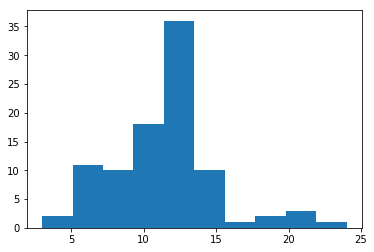

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(steps)
plt.show()


In [4]:
print("Пришло к философии в %", ledToPhi.count(True) / len(ledToPhi))

Пришло к философии в % 0.94
